In [390]:

import requests
parameters = {
    'q': 'Apple',
    'domains': 'forbes.com',
    'sortBy': 'publishedAt',
    'apiKey': '1b20fb6f9b9d40f0b4e4ad6fe5d90755'  # Assurez-vous d'utiliser votre propre clé API
}

url = 'https://newsapi.org/v2/everything'

# Appel de l'API
response = requests.get(url, params=parameters)
articles = response.json().get('articles', [])  # Utilisez .get pour éviter les erreurs si 'articles' n'existe pas

# Itérer sur chaque article récupéré
for article in articles:
    title = article.get('title', 'Titre indisponible')  # Utilisez .get pour éviter les erreurs si 'title' n'existe pas
    source_name = article.get('source', {}).get('name', 'Source indisponible')  # Récupérer le nom de la source
    url = article.get('url', 'URL indisponible')  # Récupérer l'URL de l'article
    print(f"Titre: {title}\nSource: {source_name}\nURL: {url}\n")


Titre: Magnificent Seven? Consider My Regular Seven Instead
Source: Forbes
URL: https://www.forbes.com/sites/johndorfman/2023/12/25/magnificent-seven-consider-my-regular-seven-instead/

Titre: New Hotels, New And Classic Restaurants To Know In Berlin
Source: Forbes
URL: https://www.forbes.com/sites/lauriewerner/2023/12/24/new-hotels-new-and-classic-restaurants-to-know-in-berlin/

Titre: 16 Must Have Books, Podcasts, And TV Shows For Leaders In 2024
Source: Forbes
URL: https://www.forbes.com/sites/globalcitizen/2023/12/24/16-must-have-books-podcasts-and-tv-shows-for-leaders-in-2024/

Titre: Apple Faces MacBook Air Release Problem
Source: Forbes
URL: https://www.forbes.com/sites/ewanspence/2023/12/24/apple-macbook-pro-release-date-new-macbook-air-launch-delay/

Titre: Samsung Insiders Confirm Three Stunning Galaxy S24 Ultra Decisions
Source: Forbes
URL: https://www.forbes.com/sites/ewanspence/2023/12/24/samsung-galaxy-s24-ultra-design-performance-launch-exynos-snapdragon-new-galaxy-s24-r

In [391]:
import csv

with open('articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Titre', 'URL', 'Date de publication', 'Description','Source'])
    for article in articles:
        if "Apple" not in article['title']:
          continue
        writer.writerow([article['title'], article['url'], article['publishedAt'], article['description'], article['source']['name']])

       



# Récupération du contenu des articles

In [392]:
import pandas as pd

df=pd.read_csv('articles.csv')
df

,Titre,URL,Date de publication,Description,Source
0,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24T15:29:03Z,Apple faces a crucial decision about the next-...,Forbes
1,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24T11:00:39Z,"So, you’ve just snagged a new iPhone? Congrats...",Forbes
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24T10:25:07Z,The next big iOS update is on its way and incl...,Forbes
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-23T22:28:24Z,Apple faces a crucial decision about the next-...,Forbes
4,iOS 17.3: Apple Is About To Launch An Awesome ...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23T11:00:02Z,The next big iOS update is on its way and incl...,Forbes
5,iOS 17.2.1: Apple Suddenly Releases Unexpected...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23T09:15:36Z,If you thought the next Apple update would be ...,Forbes
6,"Apple Loop: iPhone 16 Pro AI Secrets, Snapdrag...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-22T22:34:51Z,This week’s Apple headlines; leaked iPhone det...,Forbes
7,What To Stream This Weekend: New Shows And Mov...,https://www.forbes.com/sites/erikkain/2023/12/...,2023-12-22T19:13:12Z,"The final weekend of Advent is here, with Chri...",Forbes
8,Eve Play Brings Apple’s AirPlay Streaming To A...,https://www.forbes.com/sites/marksparrow/2023/...,2023-12-22T12:14:30Z,Eve Play brings Apple AirPLay 2 to almost any ...,Forbes
9,iOS 17.2.1: Apple Suddenly Releases Unexpected...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-22T10:45:02Z,If you thought the next Apple update would be ...,Forbes


In [393]:
urls = [url for url in df['URL']]
html_contents = []
compteur=0
df['Contenu']=[None] * len(df)

for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        html_contents.append(response.text)
        df['Contenu'].loc[compteur]=response.text
    else:
        print(f"Échec de récupération pour {url}")
    compteur+=1

df.head()

,Titre,URL,Date de publication,Description,Source,Contenu
0,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24T15:29:03Z,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
1,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24T11:00:39Z,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24T10:25:07Z,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-23T22:28:24Z,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
4,iOS 17.3: Apple Is About To Launch An Awesome ...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23T11:00:02Z,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."


In [394]:
#Transformation de la colonne Date de publication en DateTime

df['Date de publication']=pd.to_datetime(df['Date de publication'])
df.head()

,Titre,URL,Date de publication,Description,Source,Contenu
0,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24 15:29:03+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
1,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 11:00:39+00:00,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 10:25:07+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-23 22:28:24+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
4,iOS 17.3: Apple Is About To Launch An Awesome ...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23 11:00:02+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."


Comparaison de la taille des différents titres / descriptions / contenus

In [395]:
pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


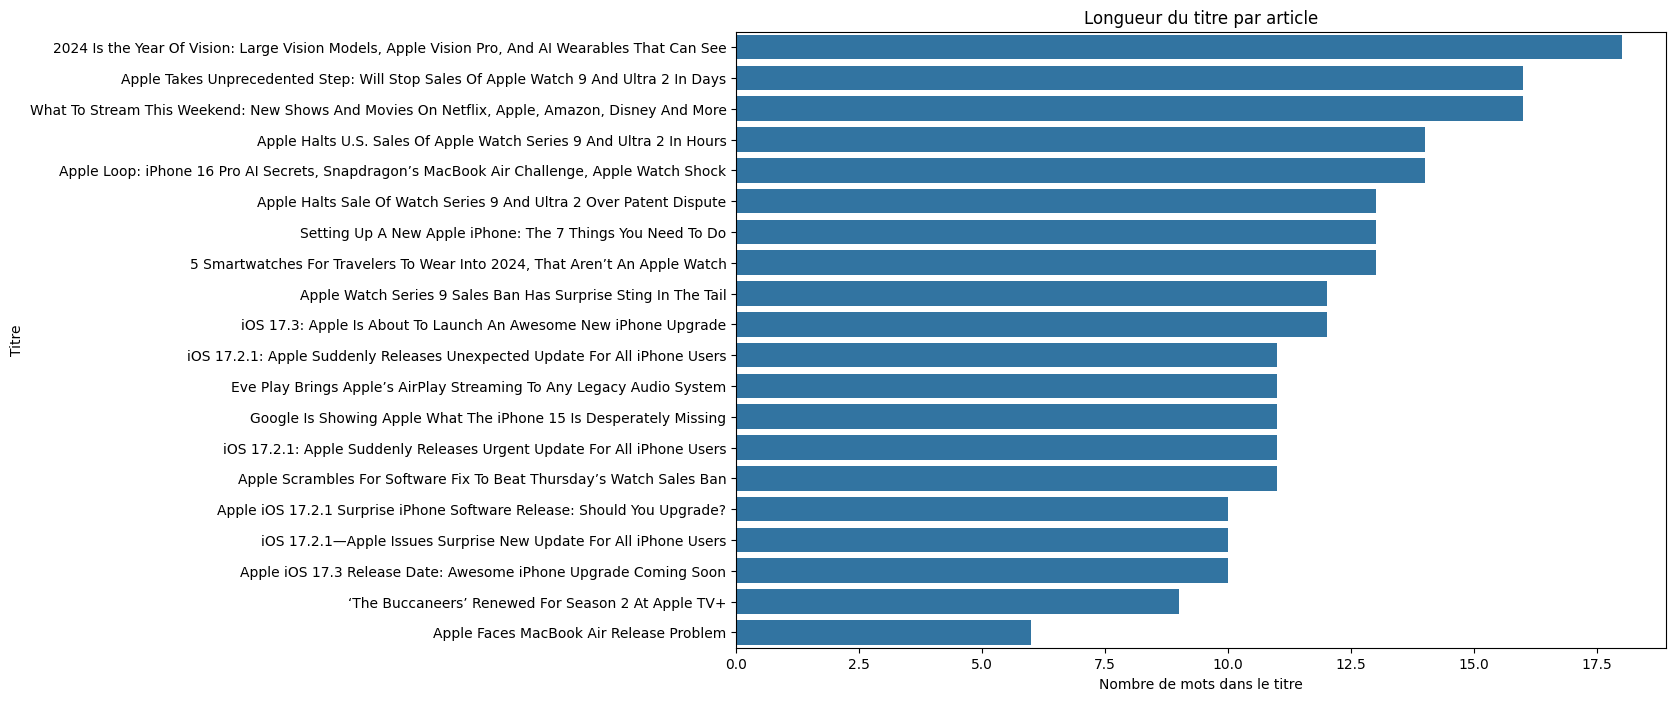

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Title_length']=df['Titre'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Title_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Title_length', y='Titre', data=df_sorted_by_title, orient='h')

plt.xlabel('Nombre de mots dans le titre')
plt.ylabel('Titre')
plt.title('Longueur du titre par article')
plt.show()

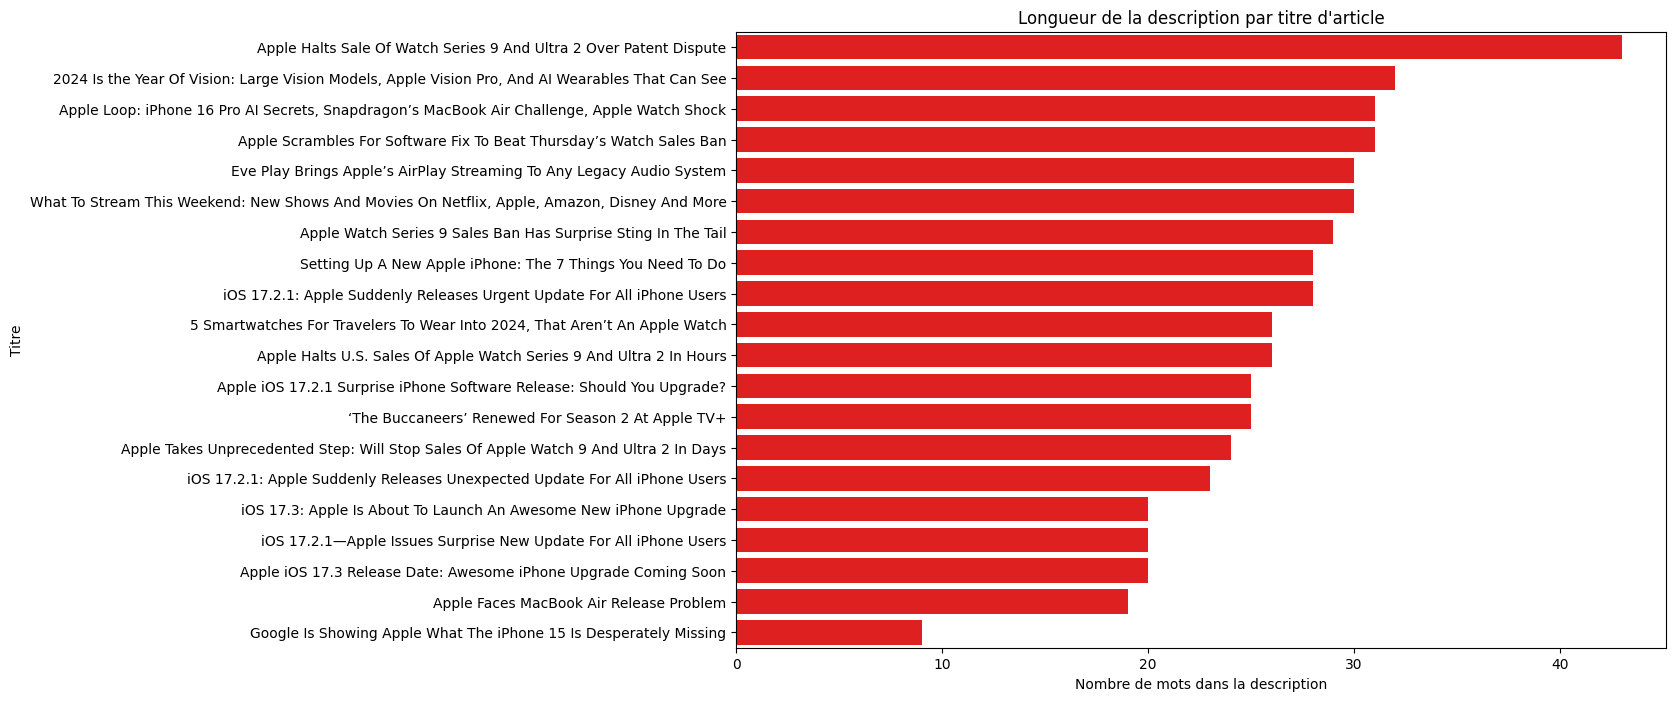

In [397]:
df['Description_length']=df['Description'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Description_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Description_length', y='Titre', data=df_sorted_by_title, orient='h', color='red')

plt.xlabel('Nombre de mots dans la description')
plt.ylabel('Titre')
plt.title('Longueur de la description par titre d\'article')
plt.show()

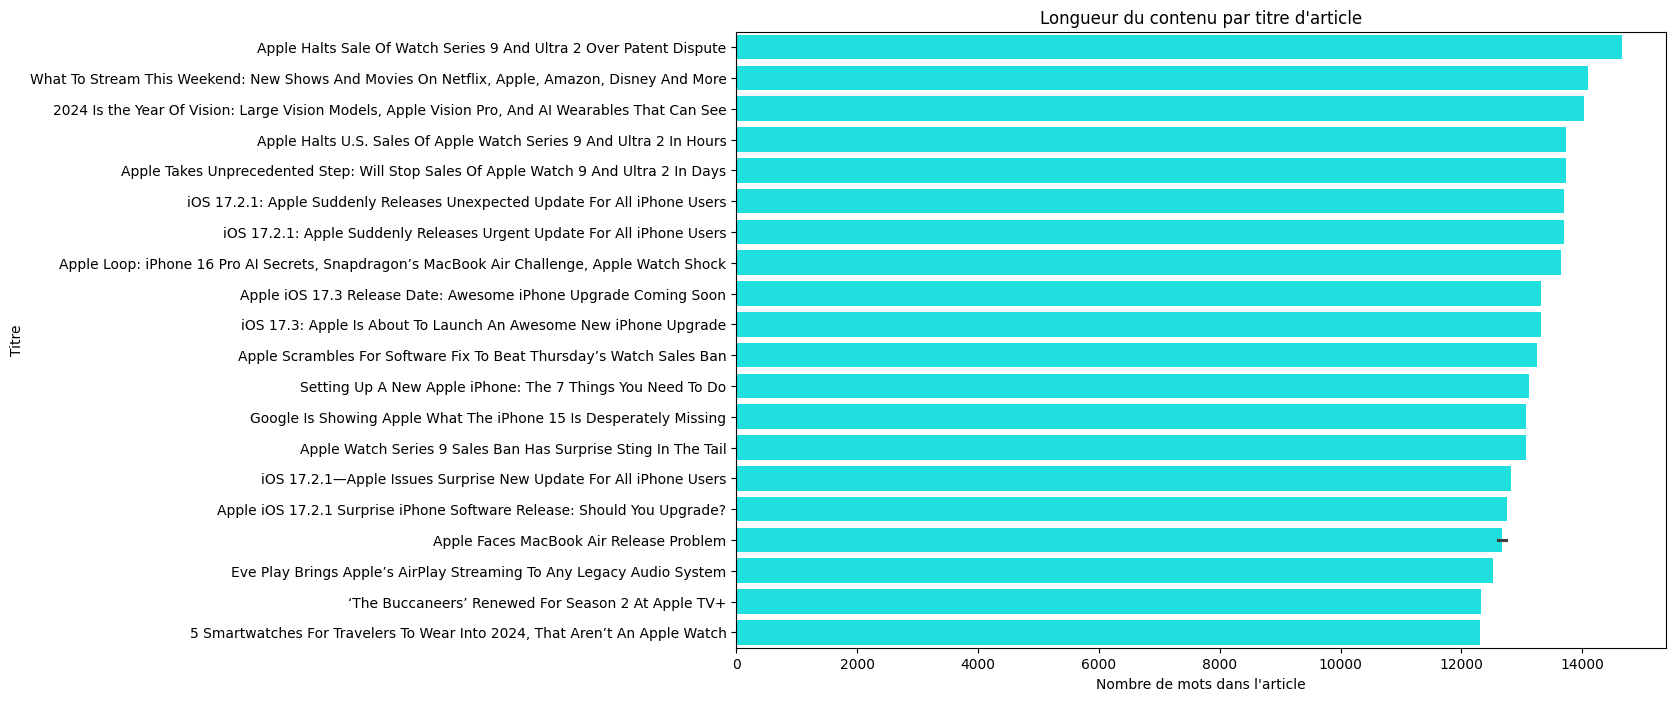

In [398]:
df['Content_length']=df['Contenu'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Content_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Content_length', y='Titre', data=df_sorted_by_title, orient='h', color='cyan')

plt.xlabel("Nombre de mots dans l'article")
plt.ylabel('Titre')
plt.title('Longueur du contenu par titre d\'article')
plt.show()

In [399]:
df_sorted_by_title

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length
22,Apple Halts Sale Of Watch Series 9 And Ultra 2...,https://www.forbes.com/sites/jamesfarrell/2023...,2023-12-18 15:53:33+00:00,Apple will halt sales of its Apple Watch Serie...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,43,14654
7,What To Stream This Weekend: New Shows And Mov...,https://www.forbes.com/sites/erikkain/2023/12/...,2023-12-22 19:13:12+00:00,"The final weekend of Advent is here, with Chri...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",16,30,14096
16,2024 Is the Year Of Vision: Large Vision Model...,https://www.forbes.com/sites/cathyhackl/2023/1...,2023-12-20 14:10:31+00:00,From computer vision to Large Vision Models an...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",18,32,14032
15,Apple Halts U.S. Sales Of Apple Watch Series 9...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-21 09:30:13+00:00,"With days left of holiday shopping, Apple sudd...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",14,26,13727
21,Apple Takes Unprecedented Step: Will Stop Sale...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-18 19:00:03+00:00,If you want to buy an Apple Watch Series 9 or ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",16,24,13727
5,iOS 17.2.1: Apple Suddenly Releases Unexpected...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23 09:15:36+00:00,If you thought the next Apple update would be ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",11,23,13691
9,iOS 17.2.1: Apple Suddenly Releases Unexpected...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-22 10:45:02+00:00,If you thought the next Apple update would be ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",11,23,13691
17,iOS 17.2.1: Apple Suddenly Releases Urgent Upd...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-20 11:39:14+00:00,If you thought the next Apple update would be ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",11,28,13691
6,"Apple Loop: iPhone 16 Pro AI Secrets, Snapdrag...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-22 22:34:51+00:00,This week’s Apple headlines; leaked iPhone det...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",14,31,13639
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 10:25:07+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,20,13308


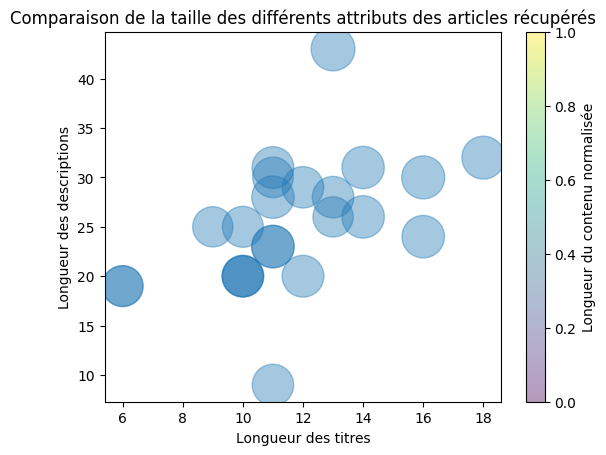

In [400]:
#Comparaison des articles récoltés entre eux selon ces trois dimensions sous forme d'un bubble chart : l'axe X correspond à la longueur du titre, l'axe Y à la longueur de la description et la taille de la bulle représentera la longueur du contenu de l'article.

import matplotlib.pyplot as plt

bubble_size=df['Content_length']/df['Content_length'].max()*1000 #Normalisation de la taille des bulles à des valeurs proches de celles obtenues pour les tailles de titre et de description

plt.scatter(x=df['Title_length'], y=df['Description_length'],s=bubble_size,alpha=0.4)
plt.xlabel('Longueur des titres')
plt.ylabel('Longueur des descriptions')
plt.title('Comparaison de la taille des différents attributs des articles récupérés')
plt.colorbar(label='Longueur du contenu normalisée')
plt.show()

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse des titres et descriptions)

**Nettoyage du texte**

In [401]:
#Fonctions importantes pour la suite 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def cleaning_text(text):
    #Passage du texte en miniscules
    text=text.lower()
    #Suppression des chiffres
    text=re.sub(r'\d+', '', text)
    #Suppression de la ponctuation et des symboles spéciaux
    text=re.sub(r'[^\w\s]', '', text)
    return text


def count_common_words(text):
    words=text.split()
    dict={}
    for el in words :
        if el not in dict:
            dict[el]=1
        else:
            dict[el]+=1
    return dict

def most_common_words(dictionary):
    sorted_dict=dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict



def combine_dictionaries(df,df_column_name):
    combined_dict={}
    column_index=df.columns.get_loc(str(df_column_name))
    for i in range(len(df)):
        temp_dictionary=df.iloc[i,int(column_index)]

        for key, value in temp_dictionary.items():
            if key not in combined_dict:
                combined_dict[key]=value
            else:
                combined_dict[key]+=value
    return combined_dict

stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_stopwords(text):
    words = word_tokenize(text)
    cleaned_text=[word for word in words if word not in stops]
    return ' '.join(cleaned_text)

In [402]:
pip install beautifulsoup4 lxml

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [403]:
import re

In [439]:
df_analyse_1=df.copy()
df_analyse_1['Titre_cleaned']=df_analyse_1['Titre'].apply(cleaning_text)
df_analyse_1['Description_cleaned']=df_analyse_1['Description'].apply(cleaning_text)


In [438]:
df_analyse_1['Counting_Words_Text']=df_analyse_1['Titre_cleaned'].apply(count_common_words)
df_analyse_1['Counting_Words_Description']=df_analyse_1['Description_cleaned'].apply(count_common_words)

In [406]:
#On affiche les mots les plus fréquents dans chaque article

df_analyse_1['Most_common_text']=df_analyse_1['Counting_Words_Text'].apply(most_common_words)
df_analyse_1['Most_common_description']=df_analyse_1['Counting_Words_Description'].apply(most_common_words)
df_analyse_1.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned,Counting_Words_Text,Counting_Words_Description,Most_common_text,Most_common_description
0,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24 15:29:03+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",6,19,12735,apple faces macbook air release problem,apple faces a crucial decision about the nextg...,"{'apple': 1, 'faces': 1, 'macbook': 1, 'air': ...","{'apple': 1, 'faces': 1, 'a': 1, 'crucial': 1,...","{'apple': 1, 'faces': 1, 'macbook': 1, 'air': ...","{'the': 2, 'macbook': 2, 'apple': 1, 'faces': ..."
1,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 11:00:39+00:00,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,28,13114,setting up a new apple iphone the things you ...,so youve just snagged a new iphone congrats he...,"{'setting': 1, 'up': 1, 'a': 1, 'new': 1, 'app...","{'so': 1, 'youve': 1, 'just': 1, 'snagged': 1,...","{'setting': 1, 'up': 1, 'a': 1, 'new': 1, 'app...","{'the': 3, 'to': 2, 'of': 2, 'so': 1, 'youve':..."
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 10:25:07+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,20,13308,apple ios release date awesome iphone upgrade...,the next big ios update is on its way and incl...,"{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'the': 1, 'next': 1, 'big': 1, 'ios': 1, 'upd...","{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'the': 1, 'next': 1, 'big': 1, 'ios': 1, 'upd..."
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-23 22:28:24+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",6,19,12601,apple faces macbook air release problem,apple faces a crucial decision about the nextg...,"{'apple': 1, 'faces': 1, 'macbook': 1, 'air': ...","{'apple': 1, 'faces': 1, 'a': 1, 'crucial': 1,...","{'apple': 1, 'faces': 1, 'macbook': 1, 'air': ...","{'the': 2, 'macbook': 2, 'apple': 1, 'faces': ..."
4,iOS 17.3: Apple Is About To Launch An Awesome ...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23 11:00:02+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,20,13308,ios apple is about to launch an awesome new i...,the next big ios update is on its way and incl...,"{'ios': 1, 'apple': 1, 'is': 1, 'about': 1, 't...","{'the': 1, 'next': 1, 'big': 1, 'ios': 1, 'upd...","{'ios': 1, 'apple': 1, 'is': 1, 'about': 1, 't...","{'the': 1, 'next': 1, 'big': 1, 'ios': 1, 'upd..."


In [407]:
#Fonction qui transforme une colonne de dictionnaires d'un dataframe en un seul dictionnaire

combined_dict_text=combine_dictionaries(df_analyse_1,'Most_common_text')
combined_dict_description= combine_dictionaries(df_analyse_1, 'Most_common_description')

In [408]:
import plotly.express as px
from collections import Counter

sorted_text_dictionary=sorted(combined_dict_text.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_text_dictionary]
values=[value for key, value in sorted_text_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les titres d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()


In [409]:
import plotly.express as px
from collections import Counter

sorted_description_dictionary=sorted(combined_dict_description.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

On observe aisément l'omniprésence de mots récurrents (stopwords) dans le corpus étudié. Nous allons donc les enlever et ensuite procéder à la deuxième étape de préparation du texte qui consistera en une lemmatisation et une analyse plus poussée.

In [410]:
pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [411]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [412]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

df_analyse_1['Titre_cleaned_stopwords']=df_analyse_1['Titre_cleaned'].apply(clean_stopwords)
df_analyse_1['Description_cleaned_stopwords']=df_analyse_1['Description_cleaned'].apply(clean_stopwords)

In [413]:
#Mots les plus fréquents après suppression des stopwords
df_analyse_1['Counting_Words_Text_nostopwords']=df_analyse_1['Titre_cleaned_stopwords'].apply(count_common_words)
df_analyse_1['Counting_Words_Descr_nostopwords']=df_analyse_1['Description_cleaned_stopwords'].apply(count_common_words)

combined_dict_text_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_text_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

In [414]:
combined_dict_description_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_description_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse du contenu des articles)

In [415]:
#Mise en place de règles propres à chaque source de données pour récupérer les parties intéressantes

from bs4 import BeautifulSoup
#Fonction adaptée aux articles Forbes et MarketWatch
def clean_html_1(text_html): 
    soup=BeautifulSoup(text_html, 'html.parser')
    title=soup.find_all('h1', class_=True)
    content=soup.find_all('p')
    united_content = ' '.join(el.get_text(strip=True) for el in title + content )
    return united_content

#Fonction adaptée aux articles de CNBC
def clean_html_2(text_html): 
    soup=BeautifulSoup(text_html, 'html.parser')
    title=soup.find_all('h1', class_=True)
    key_points=soup.find_all('li')
    content=soup.find_all('p')
    united_content = ' '.join(el.get_text(strip=True) for el in title + content + key_points )
    return united_content

df_content=df.copy()
df_content['Cleaned_html_content'] = df_content.apply(lambda row: clean_html_2(row['Contenu']) if row['Source'] == 'CNBC' else clean_html_1(row['Contenu']), axis=1)


In [416]:
df_content.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Cleaned_html_content
0,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-24 15:29:03+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",6,19,12735,Apple Faces MacBook Air Release Problem Update...
1,Setting Up A New Apple iPhone: The 7 Things Yo...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 11:00:39+00:00,"So, you’ve just snagged a new iPhone? Congrats...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,28,13114,Setting Up A New Apple iPhone: The 7 Things Yo...
2,Apple iOS 17.3 Release Date: Awesome iPhone Up...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-24 10:25:07+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,20,13308,Apple iOS 17.3 Release Date: Awesome iPhone Up...
3,Apple Faces MacBook Air Release Problem,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-23 22:28:24+00:00,Apple faces a crucial decision about the next-...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",6,19,12601,Apple Faces MacBook Air Release Problem Update...
4,iOS 17.3: Apple Is About To Launch An Awesome ...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-23 11:00:02+00:00,The next big iOS update is on its way and incl...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,20,13308,Apple iOS 17.3 Release Date: Awesome iPhone Up...


In [417]:
df_content['Content_cleaned']=df_content['Cleaned_html_content'].apply(cleaning_text)

In [418]:
df_content['Counting_Words']=df_content['Content_cleaned'].apply(count_common_words)
df_content['Most_common_text']=df_content['Counting_Words'].apply(most_common_words)

In [419]:
combined_dict_content=combine_dictionaries(df_content,'Most_common_text')
sorted_content_dictionary=sorted(combined_dict_content.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_content_dictionary]
values=[value for key, value in sorted_content_dictionary]

fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les contenus d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

On voit clairement l'omniprésence des stopwords ici. Nous allons donc les supprimer

In [420]:
df_content['Content_cleaned_from_stopwords']=df_content['Content_cleaned'].apply(clean_stopwords)


In [421]:
df_content['Counting_Words_bis']=df_content['Content_cleaned_from_stopwords'].apply(count_common_words)
df_content['Most_common_text_bis']=df_content['Counting_Words_bis'].apply(most_common_words)

combined_dict_content=combine_dictionaries(df_content,'Most_common_text_bis')
sorted_content_dictionary=sorted(combined_dict_content.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_content_dictionary]
values=[value for key, value in sorted_content_dictionary]

fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les contenus d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

In [422]:
pip install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Prédiction des sentiments

Afin de pouvoir utiliser le modèle entraîné, il est nécessaire de pré-traiter les données pour les mettre dans le même format que lors de la phase d'entraînement.

In [423]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [424]:
#Préparation des données
sequences = tokenizer.texts_to_sequences(df_content['Content_cleaned'])
padded_sequences = pad_sequences(sequences, maxlen=2209)

#Étape de prédiction
model = load_model('mon_modele_lstm.keras')
predictions = model.predict(padded_sequences)
predicted_labels = ['positif' if pred > 0.7 else 'neutre' if 0.3 < pred <= 0.7 else 'negatif' for pred in predictions]

for i, label in enumerate(predicted_labels):
    print(f"Article {i + 1}: Sentiment is {label}.")

1/1 [==============================] - 1s 673ms/step
Article 1: Sentiment is negatif.
Article 2: Sentiment is positif.
Article 3: Sentiment is negatif.
Article 4: Sentiment is negatif.
Article 5: Sentiment is negatif.
Article 6: Sentiment is negatif.
Article 7: Sentiment is negatif.
Article 8: Sentiment is negatif.
Article 9: Sentiment is negatif.
Article 10: Sentiment is negatif.
Article 11: Sentiment is negatif.
Article 12: Sentiment is negatif.
Article 13: Sentiment is negatif.
Article 14: Sentiment is negatif.
Article 15: Sentiment is positif.
Article 16: Sentiment is negatif.
Article 17: Sentiment is positif.
Article 18: Sentiment is negatif.
Article 19: Sentiment is positif.
Article 20: Sentiment is negatif.
Article 21: Sentiment is positif.
Article 22: Sentiment is negatif.
Article 23: Sentiment is negatif.


In [426]:
sequences_ = tokenizer.texts_to_sequences(df_analyse_1['Titre_cleaned'])
padded_sequences_ = pad_sequences(sequences, maxlen=2209)

#Étape de prédiction
model = load_model('mon_modele_lstm.keras')
predictions_ = model.predict(padded_sequences_)
predicted_labels_ = ['positif' if pred > 0.4 else 'negatif' for pred in predictions_]

for i, label in enumerate(predicted_labels_):
    print(f"Article {i + 1}: Sentiment is {label}.")

1/1 [==============================] - 0s 421ms/step
Article 1: Sentiment is negatif.
Article 2: Sentiment is positif.
Article 3: Sentiment is negatif.
Article 4: Sentiment is negatif.
Article 5: Sentiment is negatif.
Article 6: Sentiment is negatif.
Article 7: Sentiment is negatif.
Article 8: Sentiment is negatif.
Article 9: Sentiment is negatif.
Article 10: Sentiment is negatif.
Article 11: Sentiment is negatif.
Article 12: Sentiment is negatif.
Article 13: Sentiment is negatif.
Article 14: Sentiment is negatif.
Article 15: Sentiment is positif.
Article 16: Sentiment is negatif.
Article 17: Sentiment is positif.
Article 18: Sentiment is negatif.
Article 19: Sentiment is positif.
Article 20: Sentiment is negatif.
Article 21: Sentiment is positif.
Article 22: Sentiment is negatif.
Article 23: Sentiment is negatif.


In [427]:
predictions_

array([[6.2978261e-06],
       [9.7174233e-01],
       [7.3953292e-05],
       [6.2978261e-06],
       [7.3953292e-05],
       [1.1495135e-05],
       [1.6475584e-04],
       [7.2299044e-06],
       [1.6843098e-04],
       [1.1495135e-05],
       [4.0164796e-05],
       [1.0626135e-04],
       [1.6857246e-05],
       [4.1179667e-04],
       [9.9611205e-01],
       [1.4826113e-04],
       [9.9558157e-01],
       [1.1495135e-05],
       [9.9611205e-01],
       [3.6435846e-05],
       [9.8264867e-01],
       [1.4826113e-04],
       [2.8069424e-03]], dtype=float32)

In [428]:
pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [429]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')
for i in range(len(df_analyse_1)):
    text = df_analyse_1.iloc[i,9]
    sentiment = classifier(text)
    print(sentiment)
    


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'NEGATIVE', 'score': 0.9992703795433044}]
[{'label': 'POSITIVE', 'score': 0.9918738007545471}]
[{'label': 'POSITIVE', 'score': 0.9991652965545654}]
[{'label': 'NEGATIVE', 'score': 0.9992703795433044}]
[{'label': 'POSITIVE', 'score': 0.9996098875999451}]
[{'label': 'POSITIVE', 'score': 0.9968284964561462}]
[{'label': 'POSITIVE', 'score': 0.6900090575218201}]
[{'label': 'POSITIVE', 'score': 0.8436903953552246}]
[{'label': 'POSITIVE', 'score': 0.8163108825683594}]
[{'label': 'POSITIVE', 'score': 0.9968284964561462}]
[{'label': 'POSITIVE', 'score': 0.9861793518066406}]
[{'label': 'NEGATIVE', 'score': 0.9946140646934509}]
[{'label': 'NEGATIVE', 'score': 0.9875330328941345}]
[{'label': 'NEGATIVE', 'score': 0.9986701011657715}]
[{'label': 'NEGATIVE', 'score': 0.9340190291404724}]
[{'label': 'NEGATIVE', 'score': 0.9996994733810425}]
[{'label': 'POSITIVE', 'score': 0.985751211643219}]
[{'label': 'NEGATIVE', 'score': 0.7900848984718323}]
[{'label': 'NEGATIVE', 'score': 0.9340190291404

In [435]:
classifier = pipeline('sentiment-analysis')
for i in range(len(df_analyse_1)):
    text = df_content.iloc[i,9]
    text = text[:512]
    sentiment = classifier(text)
    print(sentiment)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'NEGATIVE', 'score': 0.9210931658744812}]
[{'label': 'POSITIVE', 'score': 0.9992915391921997}]
[{'label': 'POSITIVE', 'score': 0.979047954082489}]
[{'label': 'NEGATIVE', 'score': 0.9210931658744812}]
[{'label': 'POSITIVE', 'score': 0.979047954082489}]
[{'label': 'NEGATIVE', 'score': 0.9956026077270508}]
[{'label': 'POSITIVE', 'score': 0.9707428216934204}]
[{'label': 'POSITIVE', 'score': 0.9418611526489258}]
[{'label': 'NEGATIVE', 'score': 0.8934594988822937}]
[{'label': 'NEGATIVE', 'score': 0.9956026077270508}]
[{'label': 'NEGATIVE', 'score': 0.9847583770751953}]
[{'label': 'NEGATIVE', 'score': 0.9994975328445435}]
[{'label': 'NEGATIVE', 'score': 0.9971733093261719}]
[{'label': 'NEGATIVE', 'score': 0.9972557425498962}]
[{'label': 'POSITIVE', 'score': 0.9708517789840698}]
[{'label': 'NEGATIVE', 'score': 0.9994852542877197}]
[{'label': 'POSITIVE', 'score': 0.6103783845901489}]
[{'label': 'NEGATIVE', 'score': 0.9956026077270508}]
[{'label': 'POSITIVE', 'score': 0.97085177898406

In [431]:
for i, label in enumerate(predicted_labels_):
    print(f"Article {i + 1}: Sentiment is {label}.")

Article 1: Sentiment is negatif.
Article 2: Sentiment is positif.
Article 3: Sentiment is negatif.
Article 4: Sentiment is negatif.
Article 5: Sentiment is negatif.
Article 6: Sentiment is negatif.
Article 7: Sentiment is negatif.
Article 8: Sentiment is negatif.
Article 9: Sentiment is negatif.
Article 10: Sentiment is negatif.
Article 11: Sentiment is negatif.
Article 12: Sentiment is negatif.
Article 13: Sentiment is negatif.
Article 14: Sentiment is negatif.
Article 15: Sentiment is positif.
Article 16: Sentiment is negatif.
Article 17: Sentiment is positif.
Article 18: Sentiment is negatif.
Article 19: Sentiment is positif.
Article 20: Sentiment is negatif.
Article 21: Sentiment is positif.
Article 22: Sentiment is negatif.
Article 23: Sentiment is negatif.


Notre modèle de LSTM a ici très peu de résultats corrects. Le plus important dans notre cas est que la prédiction soit juste lorsque "positif" est renvoyé puisque nous voulons conseiller à l'utilisateur de n'acheter que si nous sommes confiants quant à nos prédictions.

In [437]:
true_positives = 0
false_positives = 0

for i in range(len(df_analyse_1)):
    #Prédiction de notre modèle LSTM
    lstm_pred = 'positif' if predictions_[i] > 0.7 else 'negatif'
    
    # Prédiction du modèle pré-entrainé
    text = df_analyse_1.iloc[i, 9]  
    hf_pred = classifier(text)[0]['label'].upper()  
    if lstm_pred == 'positif' and hf_pred == 'POSITIVE':
        true_positives += 1
    elif lstm_pred == 'positif' and hf_pred == 'NEGATIVE':
        false_positives += 1

print(f'True Positives: {true_positives}')
print(f'False Positives: {false_positives}')


True Positives: 2
False Positives: 3




On en conclut que ce modèle qui a été entraîné sur des critiques de film peine à généraliser à des articles de presse, ce à quoi on pouvait s'attendre. Dans la suite, nous allons utiliser le modèle pré-entrainé de la librairie transformers pour faire de la prédiction de sentiments sur les articles de presse récupérés.